In [ ]:
pip install ypstruct

Iteration 0: Best Cost = 25.694786402272292
Iteration 1: Best Cost = 10.48148086606188
Iteration 2: Best Cost = 5.505374292906668
Iteration 3: Best Cost = 1.5166566025324468
Iteration 4: Best Cost = 1.5166566025324468
Iteration 5: Best Cost = 1.0532276462102457
Iteration 6: Best Cost = 0.22339775940505424
Iteration 7: Best Cost = 0.21362358864025238
Iteration 8: Best Cost = 0.21223306952846907
Iteration 9: Best Cost = 0.14853964114125287
Iteration 10: Best Cost = 0.14853964114125287
Iteration 11: Best Cost = 0.141401700877726
Iteration 12: Best Cost = 0.12823722393883896
Iteration 13: Best Cost = 0.12823722393883896
Iteration 14: Best Cost = 0.124475425086403
Iteration 15: Best Cost = 0.11957095348988443
Iteration 16: Best Cost = 0.11666593742499295
Iteration 17: Best Cost = 0.11666593742499295
Iteration 18: Best Cost = 0.11099674067333107
Iteration 19: Best Cost = 0.11099674067333107
Iteration 20: Best Cost = 0.11099674067333107
Iteration 21: Best Cost = 0.11088265301121192
Iteration 

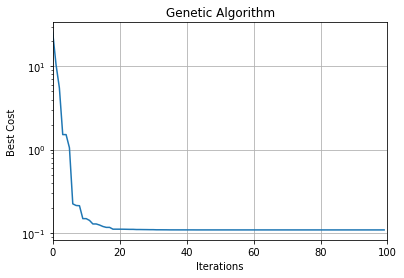

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ypstruct import structure
#Cost Function

def sphere(x):
  return np.sum(x**2)


#Problem definition
problem=structure()
problem.costfunc=sphere
problem.nvar = 5
problem.varmin = -10
problem.varmax = 10




# GA parameters
params=structure()
params.maxit=100
params.beta=1
params.npop=50
params.pc = 1
params.gamma=0.1
params.mu=0.01
params.sigma=0.1


#RUN GA
out=run(problem, params)


#Results
#plt.plot(out.bestcost)
plt.semilogy(out.bestcost)
plt.xlim(0,params.maxit)
plt.xlabel('Iterations')
plt.ylabel('Best Cost')
plt.title('Genetic Algorithm')
plt.grid(True)
plt.show()

In [ ]:
from ypstruct import structure
import numpy as np
def run(problem, params):

  #Problem Information
  costfunc=problem.costfunc
  nvar=problem.nvar
  varmin=problem.varmin
  varmax=problem.varmax

  #Parameters
  maxit=params.maxit
  npop=params.npop
  beta=params.beta
  pc=params.pc
  nc=pc*npop
  nc=int(np.round(pc*npop/2)*2)
  gamma=params.gamma
  mu=params.mu
  sigma=params.sigma

  #Empty individual Template
  empty_individual=structure()
  empty_individual.position=None
  empty_individual.cost=None

  #Best solution ever found
  bestsol=empty_individual.deepcopy()
  bestsol.cost = np.inf

  # Initilize population
  pop=empty_individual.repeat(npop)
  for i in range(0,npop):

    pop[i].position=np.random.uniform(varmin,varmax,nvar)
    pop[i].cost=costfunc(pop[i].position)
    if pop[i].cost < bestsol.cost:
      bestsol=pop[i].deepcopy()

  #Best cost of Interations
  bestcost=np.empty(maxit)


  #Main Loop
  for it in range(maxit):

    costs=[x.cost for x in pop]
    avg_cost = np.mean(costs)
    if avg_cost!=0:
      costs = costs/avg_cost
    probs = np.exp(-beta*costs)


    popc=[]
    for _ in range(nc//2):

      # Select Parents
      #q=np.random.permutation(npop)
      #p1=pop[q[0]]
      #p2=pop[q[1]]

      #Perform roulette wheel selection
      p1=pop[roulette_wheel_selection(probs)]
      p2=pop[roulette_wheel_selection(probs)]


      #Perform crossover
      c1,c2=crossover(p1,p2)

      #Perform Mutation
      c1=mutate(c1,mu,sigma)
      c2=mutate(c2,mu,sigma)

      # Apply Bounds
      apply_bounds(c1, varmin, varmax)
      apply_bounds(c2, varmin, varmax)
      
      #Evalate First offspring
      c1.cost=costfunc(c1.position)
      if c1.cost < bestsol.cost:
        bestsol=c1.deepcopy()

      #Evalate Second offspring
      c2.cost=costfunc(c2.position)
      if c2.cost < bestsol.cost:
        bestsol=c2.deepcopy()

      #Add offsprings to population
      popc.append(c1)
      popc.append(c2)

    #Merge, Sort, Select
    pop = pop + popc
    pop = sorted(pop,key=lambda x:x.cost)
    pop = pop[0:npop]

    #Store Best Cost
    bestcost[it] = bestsol.cost

    #Show iteration Information
    print("Iteration {}: Best Cost = {}".format(it, bestcost[it]))

  #Output
  out=structure()
  out.pop=pop
  out.bestsol=bestsol
  out.bestcost=bestcost
  return out

def crossover(p1,p2, gamma=0.1):
  c1=p1.deepcopy()
  c2=p2.deepcopy()
  alpha=np.random.uniform(-gamma,1+gamma,*c1.position.shape)
  c1.position=alpha*p1.position + (1-alpha)*p2.position
  c2.position=alpha*p2.position + (1-alpha)*p1.position
  return c1, c2

def mutate(x, mu, sigma):
  y=x.deepcopy()
  flag=np.random.rand(*x.position.shape) <=mu
  ind=np.argwhere(flag)
  y.position[ind]+= sigma*np.random.rand(*ind.shape)
  return y

def apply_bounds(x,varmin,varmax):
  x.position = np.maximum(x.position, varmin)
  x.position = np.minimum(x.position, varmax)


def roulette_wheel_selection(p):
  c=np.cumsum(p)
  r=sum(p)*np.random.rand()
  ind = np.argwhere(r<=c)
  return ind[0][0]




In [ ]:
out.pop[0]

structure({'position': array([ 0.00416473,  0.26220287,  0.00045479, -0.00045987,  0.19995709]), 'cost': 0.10875094748626267})

In [ ]:
out.pop[1]

structure({'position': array([ 0.00416525,  0.26220287,  0.00045484, -0.00045944,  0.19995709]), 'cost': 0.10875095003179475})